Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas. Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

*As pessoas desse experimento só verão 1 vídeo cada

*Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal

*As amostras são aleatorias e sem viéses sistematicos

Objetivo: Avaliar qual animal (cachorro ou gato) deve estar em um vídeo de campanha de adoção

Experimento: 500 pessoas que não possuem animais de estimação assistem aos vídeos de campanha de adoção. Os vídeos são idênticos com exceção dos animais mostrados:

    250 pessoas aleatorizadas para o vídeo com gato
    250 pessoas aleatorizadas para o vídeo com cachorro

Resposta: "Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?


In [ ]:
# Carregando as bibliotecas
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt

##Análise descritiva do Dataframe

In [ ]:
#lendo o arquivo csv
df= pd.read_csv("/content/drive/MyDrive/Desafio_ONG/cachorro_gato.csv")
df

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375
...,...,...,...
495,495,0,70.292458
496,496,0,74.674293
497,497,1,43.148814
498,498,0,58.625388


A coluna "Grupo" corresponde se a pessoa viu o vídeo que possui o cachorro ou o gato, sendo 0 o vídeo de cachorro e 1 vídeo de gato.
Já a Coluna "Escore" é a probabilidade da pessoa adotar um pet após ver o vídeo, que varia de 0-100.

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
grupo,0
escore,0


Podemos perceber que não há valores nulos.

In [ ]:
#principais estatísticas agrupadas de acordo com o grupo.
df.groupby('grupo').describe()

Unnamed: 0                                                           \
           count        mean         std  min    25%    50%    75%    max   
grupo                                                                       
0          253.0  247.470356  147.772334  1.0  117.0  256.0  366.0  499.0   
1          247.0  251.578947  141.301675  0.0  131.5  240.0  377.5  497.0   

      escore                                                         \
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372   
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

De acordo com os dados acima, observa-se que a média e a mediana do escore de quem viu um vídeo de gato é ligeiramente maior de quem viu o vídeo de cachorro.

##Histograma por grupo

mostrando como está a distribuição de cada um dos grupos.

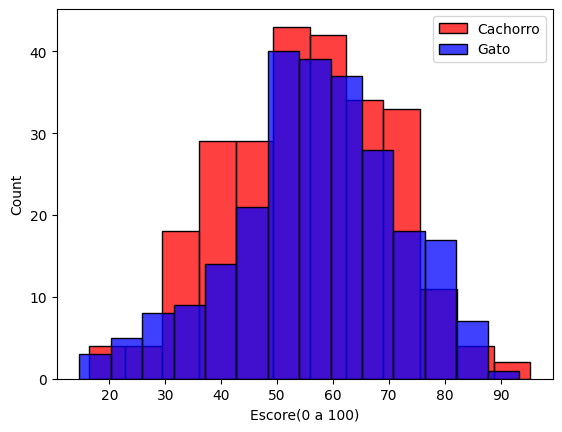

In [ ]:
#histograma grupo que viu o video de cachorro
sns.histplot(df[df['grupo']==0]['escore'], label='Cachorro', color= "red")
#histograma grupo que viu o video de gato
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Gato', color="blue")
plt.xlabel('Escore(0 a 100)')
plt.legend()
plt.show()

Com o histograma construído acima, percebe-se que as duas distribuições aproximam de uma normal e como são 2 amostras independentes, não sendo conhecido o desvio-padrão da população de ambos os grupos, o teste de hipótese para média chamado test t é a melhor opção para realizar a comparação entre eles.

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(df[df['grupo']==0]['escore'], df[df['grupo']==1]['escore'], equal_var=False)

TtestResult(statistic=-0.9164816309140925, pvalue=0.3598586668688969, df=497.17217443366343)

Como não há na questão dizendo que as variâncias são iguais, então vamos assumir que não sejam iguais e por isso colocamos "equal_var= False".

In [ ]:
t, pvalue = ttest_ind(df[df['grupo']==0]['escore'], df[df['grupo']==1]['escore'], equal_var=False)

In [ ]:
print(f"stat={t:.3f}, p={pvalue:.3f}")

stat=-0.916, p=0.360


O nosso p-valor aqui foi de aproximadamente 0.36.

Estabelecendo o nível de significância como 5%, como p > 0,05, não temos evidencias suficientes para rejeitar a hipótese nula.Assim, a um nível de confiança de 95%, dizemos que estatatisticamente as médias são iguais.
